# 2.3A Izbira modela za strojno učenje

V koraku izbira modela za strojno učenje:
- uvozimo podatke pridobljene v koraku 2. s katerih bomo učili modele
- podatke o strukturah molekule pretvorimo v fingerprinte (bitni zapis strukture, s tem dobimo featurje na X osi)
- izberemo kombinacijo najbolj primernega fingerprinta, klasifikatorja, vzorčenjske tehnike, skalarja, tehnike za zaznavanje outlierjev

# Uvoz knjižnic in splošnih funkcij

In [1]:
%run __A_knjiznice.py

from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon
%matplotlib inline
model_performance_metrics = f'{kon.path_files}/rezultati_modelov/results_df_new12.csv'

In [2]:
cv_results_df = pd.read_csv(model_performance_metrics)
cv_results_df.sort_values(by='CV_Val_Mean_Accuracy', ascending=False, inplace = True)
cv_results_o = cv_results_df[['Fingerprint','Classifier', 'Feature_Selection_Method','Dimensionality_Reduction_Method', 'CV_Val_Mean_Accuracy','Test_Accuracy', 'CV_Train_Mean_Accuracy']]
cv_results_o.head(20)

,Fingerprint,Classifier,Feature_Selection_Method,Dimensionality_Reduction_Method,CV_Val_Mean_Accuracy,Test_Accuracy,CV_Train_Mean_Accuracy
178,circular,svm,select_percentile_50,pca,0.874435,0.882992,0.915183
227,morgan,svm,select_percentile_50,none,0.874435,0.886610,0.913900
289,atom-pair,svm,select_percentile_25,none,0.872326,0.866104,0.891111
225,morgan,svm,select_percentile_25,none,0.872323,0.890229,0.904618
291,atom-pair,svm,select_percentile_50,none,0.872322,0.868516,0.895035
219,rdkit,rf,select_percentile_50,none,0.872318,0.876960,0.922653
179,circular,svm,select_percentile_50,none,0.871716,0.878166,0.918503
232,morgan,rf,select_percentile_25,pca,0.871417,0.860072,0.964760
209,rdkit,svm,select_percentile_25,none,0.871414,0.872135,0.910278
130,klekota-roth,svm,select_percentile_50,pca,0.871116,0.864897,0.901977


In [3]:
# Select relevant columns for display

# Sort the DataFrame by Classifier and CV_Val_Mean_Accuracy in descending order
cv_results_o = cv_results_o.sort_values(by=['Classifier', 'CV_Val_Mean_Accuracy'], ascending=[True, False])

# Get the top 3 combinations for each Classifier
top_3_per_classifier = cv_results_o.groupby('Classifier').head(3).reset_index(drop=True)

print('Top 3 combinations at each classifier')
# Display the results
top_3_per_classifier

Top 3 combinations at each classifier


,Fingerprint,Classifier,Feature_Selection_Method,Dimensionality_Reduction_Method,CV_Val_Mean_Accuracy,Test_Accuracy,CV_Train_Mean_Accuracy
0,morgan,lr,select_percentile_25,none,0.860860,0.873341,0.918881
1,standard,lr,select_percentile_50,pca,0.856629,0.857660,0.876472
2,klekota-roth,lr,select_percentile_50,none,0.856326,0.872135,0.910203
3,rdkit,rf,select_percentile_50,none,0.872318,0.876960,0.922653
4,morgan,rf,select_percentile_25,pca,0.871417,0.860072,0.964760
5,rdkit,rf,select_percentile_25,none,0.871110,0.874548,0.916843
6,circular,svm,select_percentile_50,pca,0.874435,0.882992,0.915183
7,morgan,svm,select_percentile_50,none,0.874435,0.886610,0.913900
8,atom-pair,svm,select_percentile_25,none,0.872326,0.866104,0.891111
9,avalon,xgb,select_percentile_50,none,0.869604,0.872135,0.922050


In [4]:
cv_results_df = pd.read_csv(model_performance_metrics)

cv_results_df = cv_results_df.sort_values(by=['Fingerprint', 'Classifier', 'CV_Val_Mean_Accuracy'], 
                                               ascending=[True, True, False])

# Keep only the best row per Fingerprint-Classifier pair
best_per_fingerprint_classifier = cv_results_df.groupby(['Fingerprint', 'Classifier']).head(1).reset_index(drop=True)

# Display the final results
# Calculate average accuracy per Fingerprint
avg_accuracy_per_fingerprint = (
    best_per_fingerprint_classifier
    .groupby('Fingerprint', as_index=False)
    .agg({'CV_Val_Mean_Accuracy': 'mean'})
    .sort_values(by='CV_Val_Mean_Accuracy', ascending=False)
)

# Keep only the top 10 fingerprints
top_10_fingerprints = avg_accuracy_per_fingerprint.head(10)['Fingerprint']

# Filter the original dataframe for these top 10 fingerprints
cv_results_top_10_df = best_per_fingerprint_classifier[
    best_per_fingerprint_classifier['Fingerprint'].isin(top_10_fingerprints)
]

## Pregled podatkov

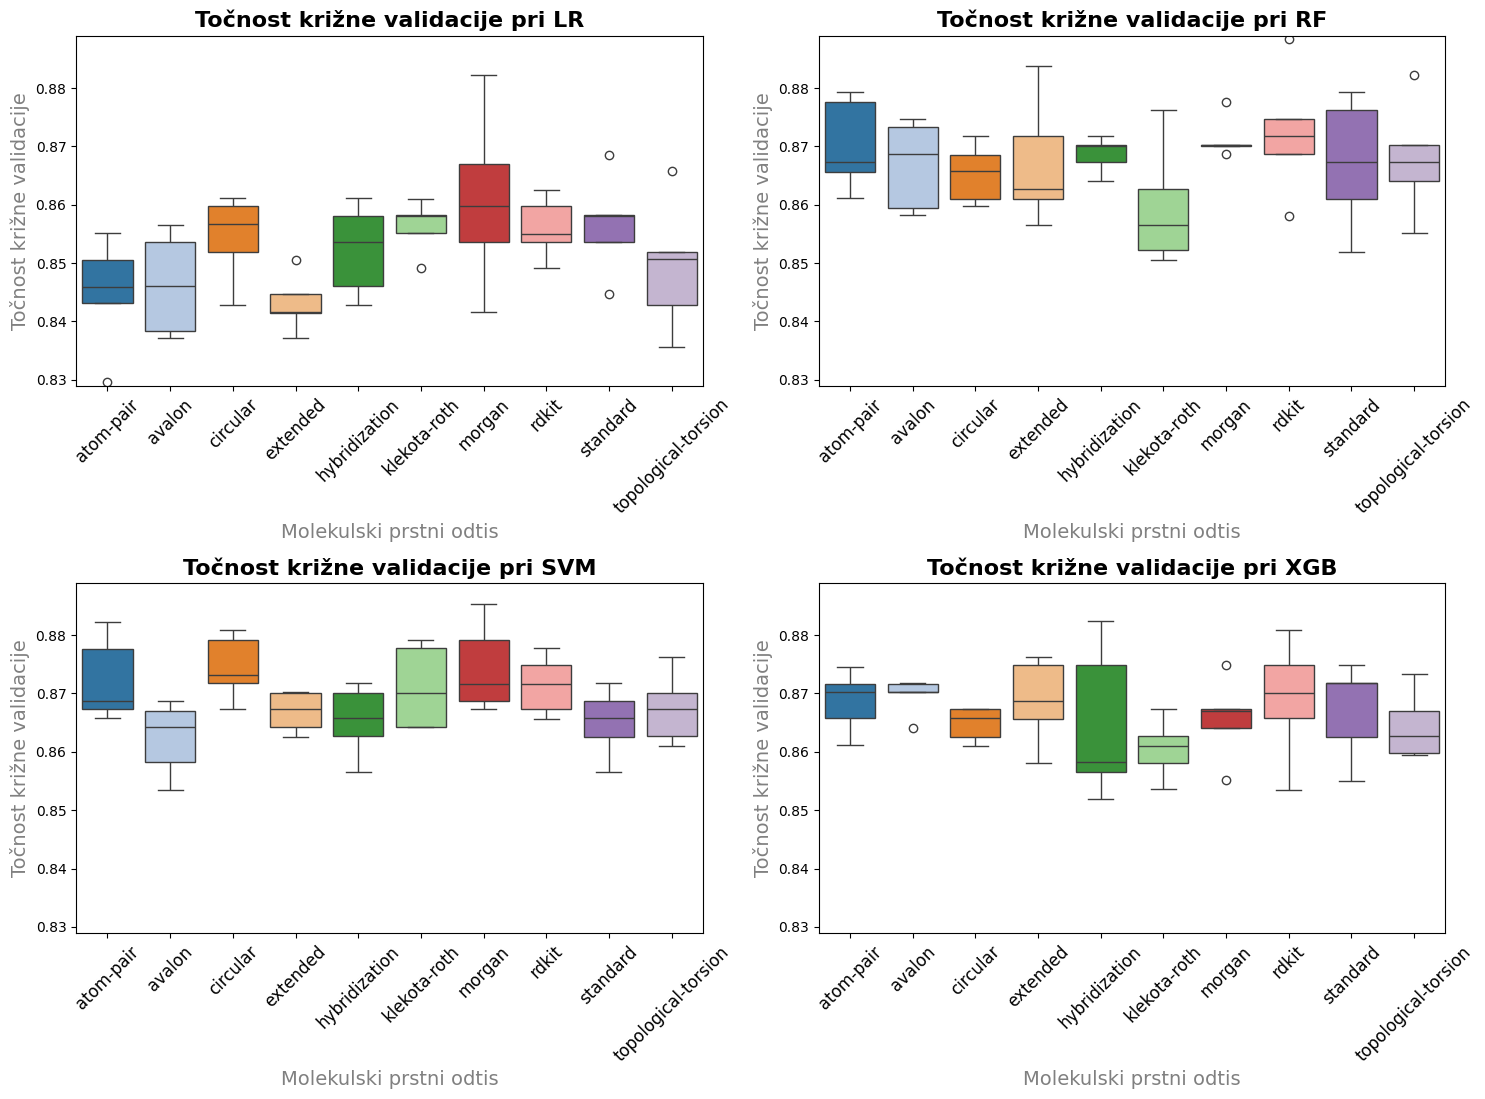

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results from CSV
cv_results_df = cv_results_top_10_df.copy()

# Ensure CV_Validation_Accuracy_Folds is interpreted as a list
cv_results_df['CV_Val_Accuracy_Folds'] = cv_results_df['CV_Val_Accuracy_Folds'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Explode 'CV_Validation_Accuracy_Folds' into individual rows
cv_results_df = cv_results_df.explode('CV_Val_Accuracy_Folds')

# Ensure 'Fingerprint' is ordered alphabetically
fingerprint_order = sorted(cv_results_df['Fingerprint'].unique())
cv_results_df['Fingerprint'] = pd.Categorical(cv_results_df['Fingerprint'], categories=fingerprint_order, ordered=True)

# Define color palette for fingerprints
palette = sns.color_palette('tab20', n_colors=len(fingerprint_order))

# Calculate global y-axis limits
y_min = float(cv_results_df['CV_Val_Accuracy_Folds'].min())
y_max = float(cv_results_df['CV_Val_Accuracy_Folds'].max())
y_margin = (y_max - y_min) * 0.01  # Add 1% margin for better visibility
y_min -= y_margin
y_max += y_margin

# Plotting Cross-Validation Accuracy
plt.figure(figsize=(15, 15))

# Create a plot for each classifier
for i, clf_name in enumerate(cv_results_df['Classifier'].unique()):
    plt.subplot(3, 2, i + 1)  # Create a grid of subplots
    clf_data = cv_results_df[cv_results_df['Classifier'] == clf_name]
    
    # Box plot for the distribution of CV_Val_Accuracy_Folds
    sns.boxplot(
        data=clf_data,
        x='Fingerprint',
        y='CV_Val_Accuracy_Folds',
        hue='Fingerprint',  # Explicitly set hue to match the x-axis
        palette=palette,
        legend=False  # Disable redundant legend
    )
    
    plt.title(f'Točnost križne validacije pri {clf_name.upper()}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel('Točnost križne validacije', fontsize=14,color='gray')
    plt.xlabel('Molekulski prstni odtis', fontsize=14, color='gray')
    plt.ylim(y_min, y_max)  # Apply shared y-axis limits

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

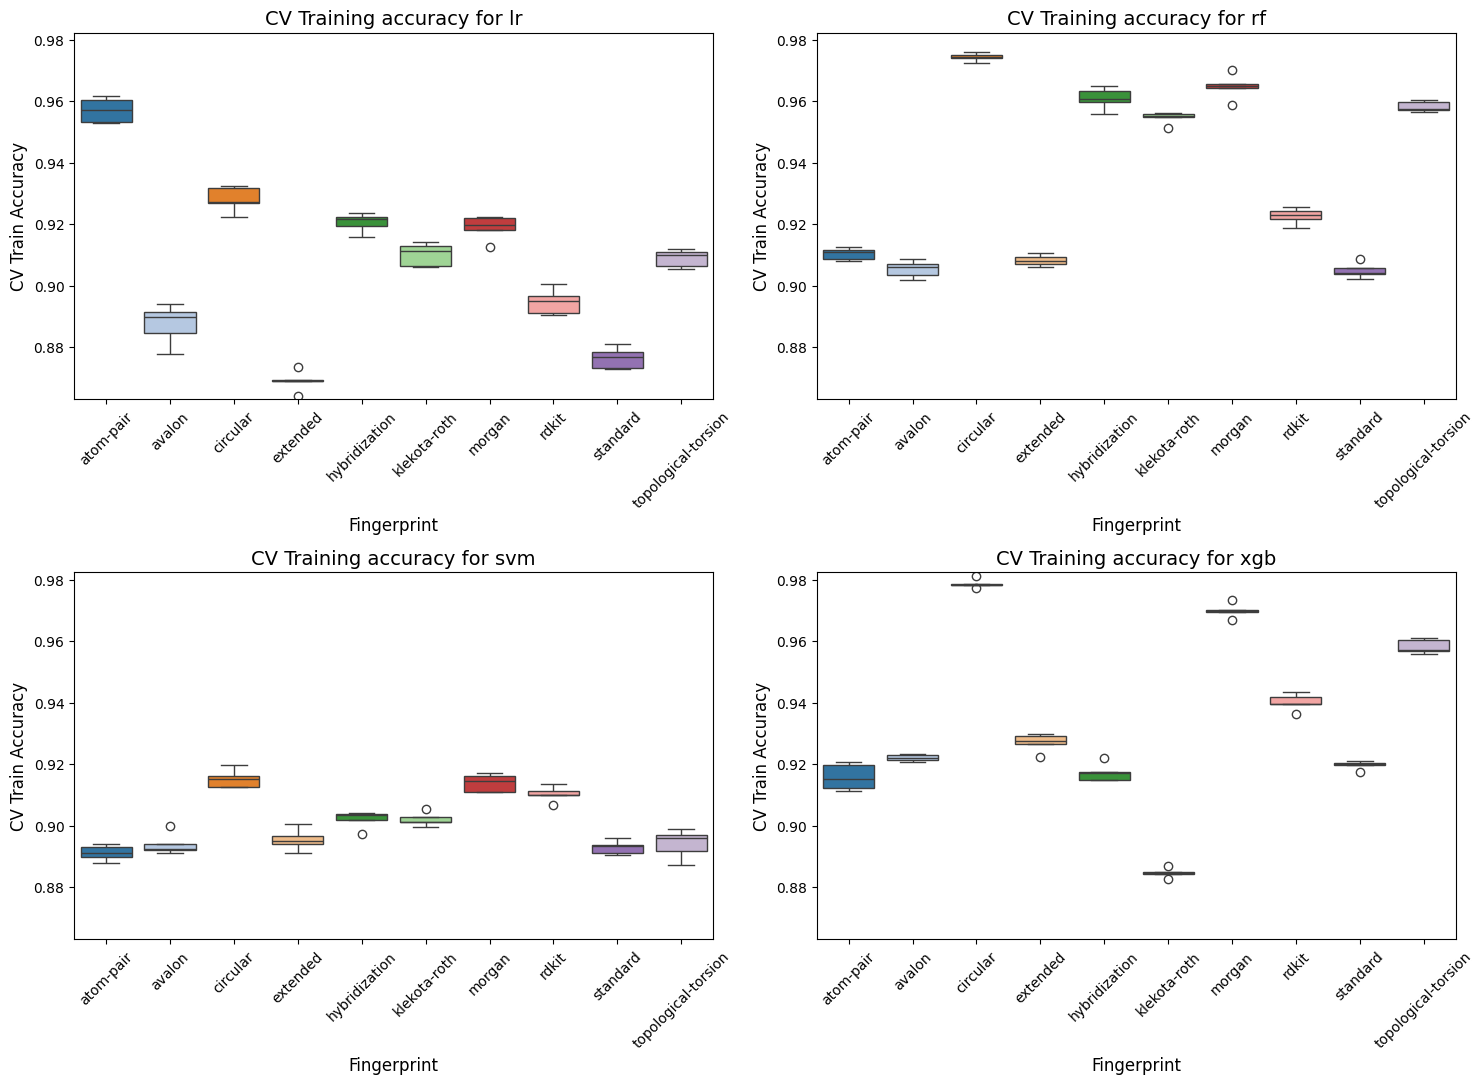

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results from CSV
cv_results_df = cv_results_top_10_df.copy()

# Ensure CV_Validation_Accuracy_Folds is interpreted as a list
cv_results_df['CV_Train_Accuracy_Folds'] = cv_results_df['CV_Train_Accuracy_Folds'].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Explode 'CV_Validation_Accuracy_Folds' into individual rows
cv_results_df = cv_results_df.explode('CV_Train_Accuracy_Folds')

# Ensure 'Fingerprint' is ordered alphabetically
fingerprint_order = sorted(cv_results_df['Fingerprint'].unique())
cv_results_df['Fingerprint'] = pd.Categorical(cv_results_df['Fingerprint'], categories=fingerprint_order, ordered=True)

# Define color palette for fingerprints
palette = sns.color_palette('tab20', n_colors=len(fingerprint_order))

# Calculate global y-axis limits
y_min = float(cv_results_df['CV_Train_Accuracy_Folds'].min())
y_max = float(cv_results_df['CV_Train_Accuracy_Folds'].max())
y_margin = (y_max - y_min) * 0.01  # Add 1% margin for better visibility
y_min -= y_margin
y_max += y_margin

# Plotting Cross-Validation Accuracy
plt.figure(figsize=(15, 15))

# Create a plot for each classifier
for i, clf_name in enumerate(cv_results_df['Classifier'].unique()):
    plt.subplot(3, 2, i + 1)  # Create a grid of subplots
    clf_data = cv_results_df[cv_results_df['Classifier'] == clf_name]
    
    # Box plot for the distribution of CV_Val_Accuracy_Folds
    sns.boxplot(
        data=clf_data,
        x='Fingerprint',
        y='CV_Train_Accuracy_Folds',
        hue='Fingerprint',  # Explicitly set hue to match the x-axis
        palette=palette,
        legend=False  # Disable redundant legend
    )
    
    plt.title(f'CV Training accuracy for {clf_name}', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel('CV Train Accuracy', fontsize=12)
    plt.xlabel('Fingerprint', fontsize=12)
    plt.ylim(y_min, y_max)  # Apply shared y-axis limits

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

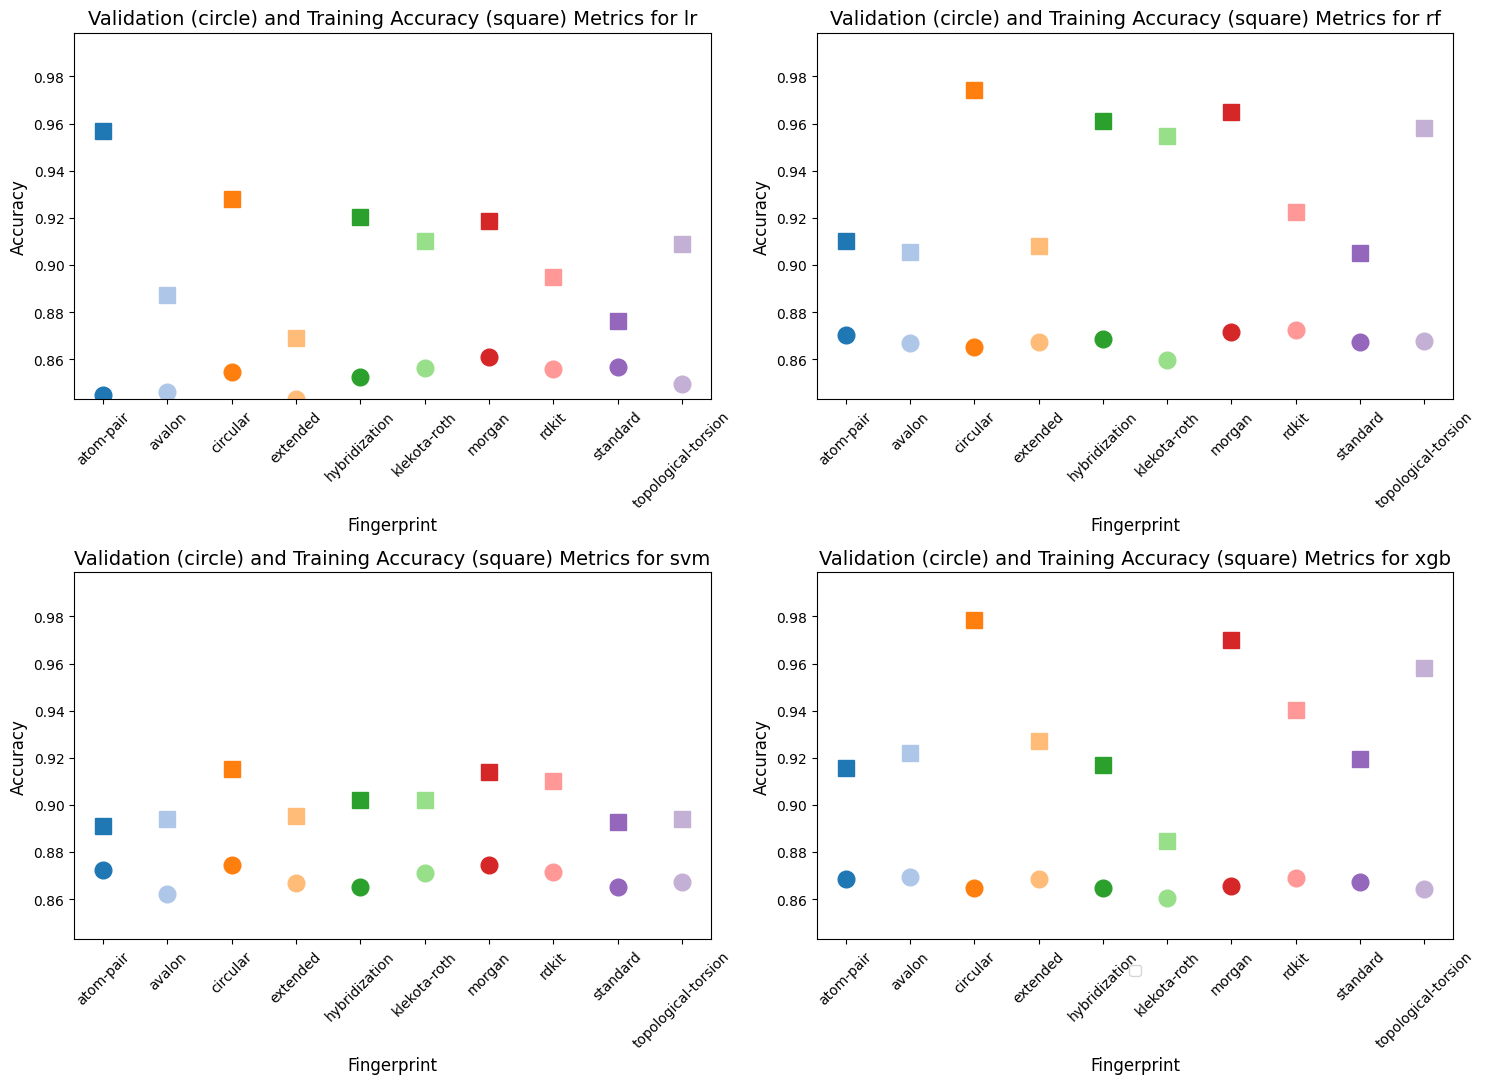

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results from CSV
cv_results_df = cv_results_top_10_df.copy()

# Ensure 'Fingerprint' is ordered alphabetically
fingerprint_order = sorted(cv_results_df['Fingerprint'].unique())
cv_results_df['Fingerprint'] = pd.Categorical(cv_results_df['Fingerprint'], categories=fingerprint_order, ordered=True)

# Define color palette for fingerprints
palette = sns.color_palette('tab20', n_colors=len(fingerprint_order))
color_mapping = {fingerprint: palette[i] for i, fingerprint in enumerate(fingerprint_order)}

# Determine global y-axis limits
y_min = min(cv_results_df['CV_Val_Mean_Accuracy'].min(), cv_results_df['CV_Train_Mean_Accuracy'].min())
y_max = max(cv_results_df['CV_Val_Mean_Accuracy'].max(), cv_results_df['CV_Train_Mean_Accuracy'].max())

# Plotting CV Mean Accuracy and CV Train Mean Accuracy
plt.figure(figsize=(15, 15))

# Create a plot for each classifier
for i, clf_name in enumerate(cv_results_df['Classifier'].unique()):
    plt.subplot(3, 2, i + 1)  # Create a grid of subplots
    clf_data = cv_results_df[cv_results_df['Classifier'] == clf_name]
    
    for _, row in clf_data.iterrows():
        # Plot CV_Mean_Accuracy as a dot (•)
        plt.plot(
            row['Fingerprint'], 
            row['CV_Val_Mean_Accuracy'], 
            marker='o',  # Dot marker
            markersize=12,  # Dot size
            color=color_mapping[row['Fingerprint']], 
            label='CV_Val_Mean_Accuracy' if i == 0 and _ == 0 else ""  # Add legend only once
        )
        
        # Plot CV_Train_Mean_Accuracy as a square (■)
        plt.plot(
            row['Fingerprint'], 
            row['CV_Train_Mean_Accuracy'], 
            marker='s',  # Square marker
            markersize=12,  # Square size
            color=color_mapping[row['Fingerprint']],
            label='CV_Train_Mean_Accuracy' if i == 0 and _ == 0 else ""  # Add legend only once
        )
    
    plt.title(f'Validation (circle) and Training Accuracy (square) Metrics for {clf_name}', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Fingerprint', fontsize=12)
    plt.ylim(y_min, y_max + 0.02)  # Apply shared y-axis limits

# Add a global legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

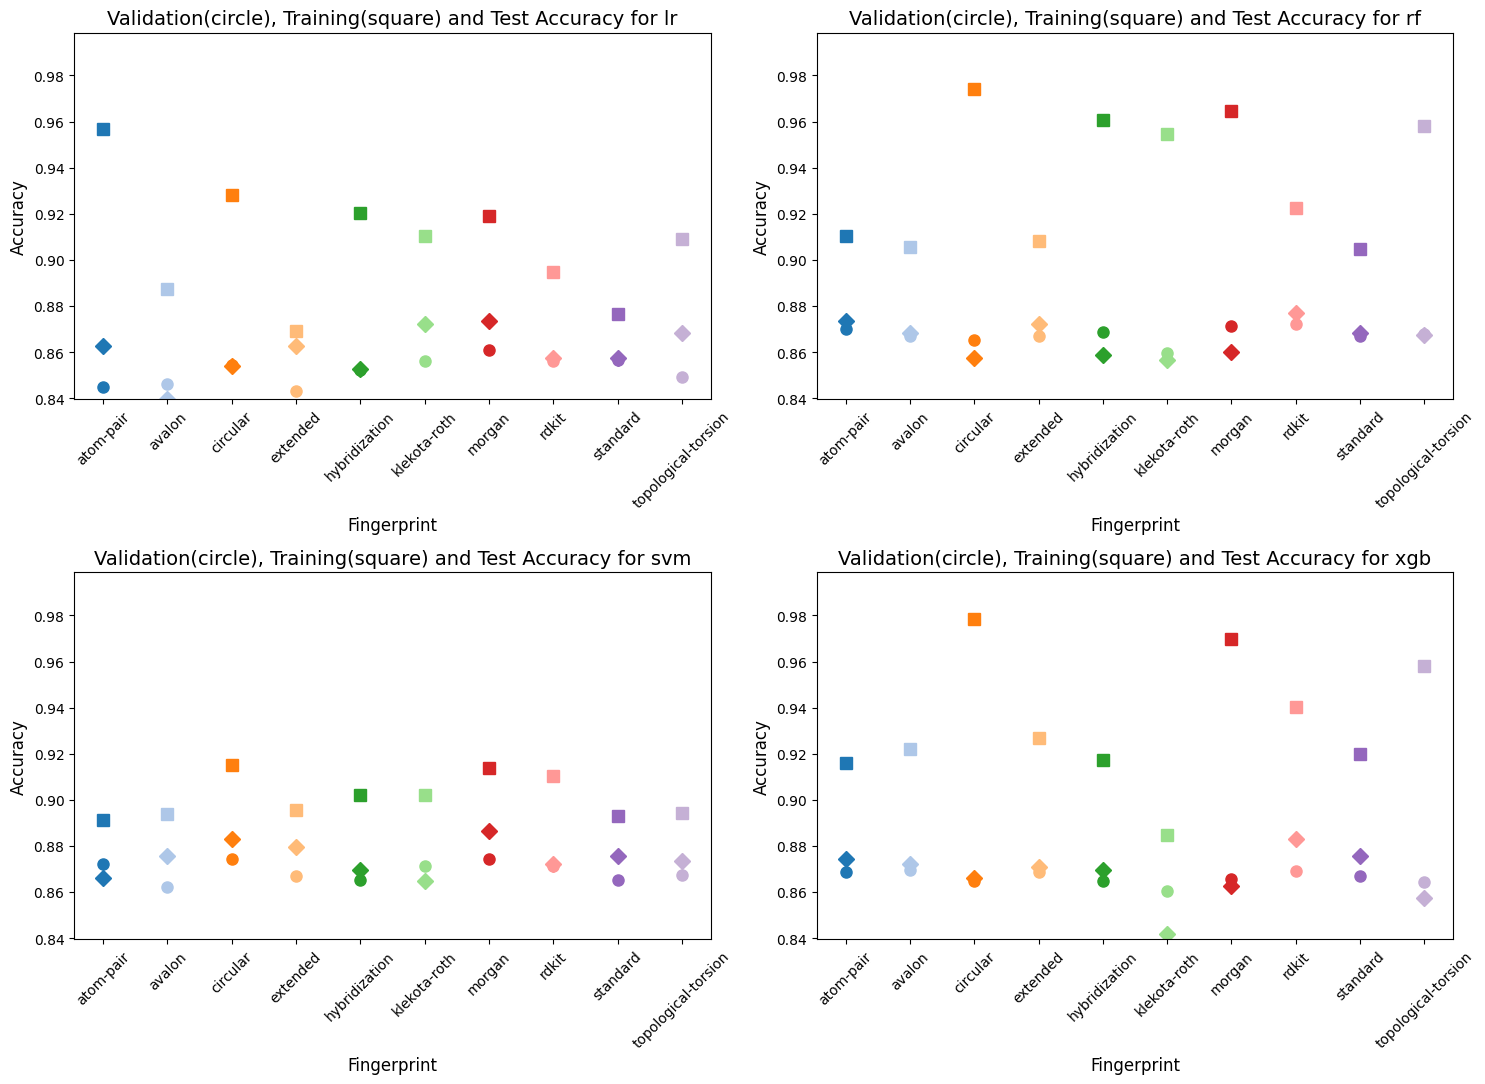

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results from CSV
cv_results_df = cv_results_top_10_df.copy()

# Ensure 'Fingerprint' is ordered alphabetically
fingerprint_order = sorted(cv_results_df['Fingerprint'].unique())
cv_results_df['Fingerprint'] = pd.Categorical(cv_results_df['Fingerprint'], categories=fingerprint_order, ordered=True)

# Define color palette for fingerprints
palette = sns.color_palette('tab20', n_colors=len(fingerprint_order))
color_mapping = {fingerprint: palette[i] for i, fingerprint in enumerate(fingerprint_order)}

# Determine global y-axis limits
y_min = min(cv_results_df['CV_Val_Mean_Accuracy'].min(), cv_results_df['CV_Train_Mean_Accuracy'].min(), cv_results_df['Test_Accuracy'].min())
y_max = max(cv_results_df['CV_Val_Mean_Accuracy'].max(), cv_results_df['CV_Train_Mean_Accuracy'].max(), cv_results_df['Test_Accuracy'].max())

# Plotting CV Mean Accuracy, CV Train Mean Accuracy, and Test Accuracy
plt.figure(figsize=(15, 15))  # Increase figure size for better layout

# Create a plot for each classifier
for i, clf_name in enumerate(cv_results_df['Classifier'].unique()):
    plt.subplot(3, 2, i + 1)  # Create a grid of subplots
    clf_data = cv_results_df[cv_results_df['Classifier'] == clf_name]
    
    for _, row in clf_data.iterrows():
        # Plot CV_Val_Mean_Accuracy as a dot (•)
        plt.plot(
            row['Fingerprint'], 
            row['CV_Val_Mean_Accuracy'], 
            marker='o',  # Dot marker
            markersize=8,  # Dot size
            color=color_mapping[row['Fingerprint']], 
            label='CV_Val_Mean_Accuracy' if i == 0 and _ == 0 else ""  # Add legend only once
        )
        
        # Plot CV_Train_Mean_Accuracy as a square (■)
        plt.plot(
            row['Fingerprint'], 
            row['CV_Train_Mean_Accuracy'], 
            marker='s',  # Square marker
            markersize=8,  # Square size
            color=color_mapping[row['Fingerprint']],
            label='CV_Train_Mean_Accuracy' if i == 0 and _ == 0 else ""  # Add legend only once
        )
        
        # Plot Test_Accuracy as a diamond (♦)
        plt.plot(
            row['Fingerprint'], 
            row['Test_Accuracy'], 
            marker='D',  # Diamond marker
            markersize=8,  # Diamond size
            color=color_mapping[row['Fingerprint']], 
            label='Test_Accuracy' if i == 0 and _ == 0 else ""  # Add legend only once
        )
    
    plt.title(f'Validation(circle), Training(square) and Test Accuracy for {clf_name}', fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Fingerprint', fontsize=12)
    plt.ylim(y_min, y_max + 0.02)  # Apply shared y-axis limits

# Remove the global legend
plt.tight_layout()
plt.show()

In [9]:
results_df = cv_results_df = pd.read_csv(model_performance_metrics)
# results_df

In [10]:
results_df.sort_values(by=['CV_Val_Mean_Accuracy'], ascending=False, inplace = True)
results_df[['Fingerprint','Classifier','CV_Train_Mean_Accuracy','CV_Val_Mean_Accuracy']]

,Fingerprint,Classifier,CV_Train_Mean_Accuracy,CV_Val_Mean_Accuracy
178,circular,svm,0.915183,0.874435
227,morgan,svm,0.913900,0.874435
289,atom-pair,svm,0.891111,0.872326
225,morgan,svm,0.904618,0.872323
291,atom-pair,svm,0.895035,0.872322
...,...,...,...,...
81,estate,svm,0.750679,0.743440
86,estate,lr,0.742680,0.743439
93,estate,xgb,0.747888,0.743139
84,estate,lr,0.715364,0.715067


In [11]:
clf_avg_df = results_df.groupby('Classifier').agg({
    'CV_Val_Mean_Accuracy': 'mean',
    'CV_Train_Mean_Accuracy': 'mean',
    'Test_Accuracy': 'mean',
}).reset_index()

clf_avg_df.sort_values(by=['CV_Val_Mean_Accuracy'], ascending=False, inplace = True)
clf_avg_df

,Classifier,CV_Val_Mean_Accuracy,CV_Train_Mean_Accuracy,Test_Accuracy
2,svm,0.853966,0.882601,0.860706
1,rf,0.851754,0.910949,0.855293
3,xgb,0.849079,0.913371,0.853498
0,lr,0.824912,0.855304,0.830232


In [12]:
# Group by 'classifier' and 'Fingerprint', then calculate the mean for the specified columns
fgp_avg_df = results_df.groupby(['Classifier', 'Fingerprint'], observed=False).agg({
    'CV_Val_Mean_Accuracy': 'mean',
    'CV_Train_Mean_Accuracy': 'mean',  # Include CV_Train_Mean_Accuracy
    'Test_Accuracy': 'mean',
}).reset_index()

# Get the top 3 fingerprints for each classifier based on CV_Val_Mean_Accuracy
top_fgp_df = fgp_avg_df.sort_values(by=['Classifier', 'CV_Val_Mean_Accuracy'], ascending=[True, False]) \
                        .groupby('Classifier', observed=False) \
                        .head(3) \
                        .reset_index(drop=True)

# Calculate the maximum CV_Val_Mean_Accuracy for the top 3 fingerprints of each classifier
max_top_fgp = top_fgp_df.groupby('Classifier', observed=False).agg({
    'CV_Val_Mean_Accuracy': 'max'
}).reset_index()

# Merge the maximum back to the top_fgp_df to retain the fingerprints
top_fgp_df = top_fgp_df.merge(max_top_fgp, on='Classifier', suffixes=('', '_max'))

# Sort the final DataFrame by the maximum CV_Val_Mean_Accuracy of the top 3 fingerprints in descending order
top_fgp_df.sort_values(by='CV_Val_Mean_Accuracy_max', ascending=False, inplace=True)

# Drop the max column before printing
top_fgp_df.drop(columns=['CV_Val_Mean_Accuracy_max'], inplace=True)

print('Top 3 fingerprints by CV_Val_Mean_Accuracy by classifier')
# Display the final DataFrame with classifiers, fingerprints, and sorted by CV_Val_Mean_Accuracy
top_fgp_df

Top 3 fingerprints by CV_Val_Mean_Accuracy by classifier


,Classifier,Fingerprint,CV_Val_Mean_Accuracy,CV_Train_Mean_Accuracy,Test_Accuracy
6,svm,morgan,0.871945,0.906071,0.886309
7,svm,circular,0.871341,0.911825,0.877262
8,svm,rdkit,0.870433,0.906279,0.871532
3,rf,rdkit,0.869375,0.942688,0.870627
4,rf,morgan,0.869305,0.927954,0.867310
5,rf,standard,0.865828,0.929143,0.867913
9,xgb,rdkit,0.864922,0.954365,0.868516
10,xgb,atom-pair,0.864172,0.935764,0.866104
11,xgb,morgan,0.862135,0.932916,0.869723
0,lr,morgan,0.856630,0.913202,0.870024


In [13]:
# Group by 'classifier' and 'Fingerprint', then calculate the mean for the specified columns
fgp_avg_df = results_df.groupby(['Classifier', 'Fingerprint'], observed=False).agg({
    'CV_Val_Mean_Accuracy': 'mean',
    'Test_Accuracy': 'mean',
}).reset_index()

# Get the top 3 fingerprints for each classifier based on CV_Mean_Accuracy
top_fgp_df = fgp_avg_df.sort_values(by=['Classifier', 'CV_Val_Mean_Accuracy'], ascending=[True, False]) \
                        .groupby('Classifier', observed=False) \
                        .head(1) \
                        .reset_index(drop=True)

# Calculate the maximum CV_Mean_Accuracy for the top 3 fingerprints of each classifier
max_top_fgp = top_fgp_df.groupby('Classifier', observed=False).agg({
    'CV_Val_Mean_Accuracy': 'max'
}).reset_index()

# Merge the maximum back to the top_fgp_df to retain the fingerprints
top_fgp_df = top_fgp_df.merge(max_top_fgp, on='Classifier', suffixes=('', '_max'))

# Sort the final DataFrame by the maximum CV_Mean_Accuracy of the top 3 fingerprints in descending order
top_fgp_df.sort_values(by='CV_Val_Mean_Accuracy_max', ascending=False, inplace=True)

print('Top 3 fingerptints by CV_Val_Mean_Accuracy by classifier')
# Display the final DataFrame with classifiers, fingerprints, and sorted by max CV_Mean_Accuracy
top_fgp_df

Top 3 fingerptints by CV_Val_Mean_Accuracy by classifier


,Classifier,Fingerprint,CV_Val_Mean_Accuracy,Test_Accuracy,CV_Val_Mean_Accuracy_max
2,svm,morgan,0.871945,0.886309,0.871945
1,rf,rdkit,0.869375,0.870627,0.869375
3,xgb,rdkit,0.864922,0.868516,0.864922
0,lr,morgan,0.856630,0.870024,0.856630


In [14]:
results_df.sort_values(by=['CV_Val_Mean_Accuracy'], ascending=False, inplace = True)
results_df[['Fingerprint', 'Classifier','CV_Val_Mean_Accuracy', 'CV_Train_Mean_Accuracy','Test_Accuracy']].head(5)

,Fingerprint,Classifier,CV_Val_Mean_Accuracy,CV_Train_Mean_Accuracy,Test_Accuracy
178,circular,svm,0.874435,0.915183,0.882992
227,morgan,svm,0.874435,0.913900,0.886610
289,atom-pair,svm,0.872326,0.891111,0.866104
225,morgan,svm,0.872323,0.904618,0.890229
291,atom-pair,svm,0.872322,0.895035,0.868516
